# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">1. Business Understanding</p>

<h5>Masalah utama pada Serpong Garden Apartment adalah strategi promosi yang tidak terpersonalisasi, menyebabkan rendahnya konversi pembelian. Selain itu, data pelanggan tidak dimanfaatkan secara maksimal. Solusi yang diusulkan adalah penerapan machine learning untuk memprediksi tujuan pembelian pelanggan (tempat tinggal atau investasi) menggunakan algoritma seperti Naive Bayes, Decision Tree, dan Random Forest. Ini akan memungkinkan tim pemasaran untuk memberikan promosi yang lebih personal dan tepat sasaran, serta mengurangi pemborosan anggaran promosi.</h5>
<h5>Tujuan Sistem</h5>
<li>Menyediakan promosi yang lebih personal dan relevan.</li>
<li>Memanfaatkan data pelanggan untuk prediksi tujuan pembelian.</li>
<li>Mengurangi pemborosan anggaran promosi.</li>

# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">2. Data Understanding</p>

In [1]:
# Import library untuk manipulasi data
import pandas as pd  # Untuk pengolahan data tabular
import numpy as np   # Untuk komputasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk visualisasi data statistik
from skimpy import skim # Import library skimpy untuk mendapatkan ringkasan statistik data yang lebih detail dan mudah dibaca
from summarytools import dfSummary # Import library summarytools untuk membuat ringkasan data yang komprehensif termasuk statistik, distribusi, dan missing values

# Import library untuk preprocessing data
from sklearn.model_selection import train_test_split  # Untuk membagi data train dan test
from sklearn.preprocessing import LabelEncoder  # Untuk encoding label kategorikal
from imblearn.over_sampling import SMOTE  # Untuk menangani data tidak seimbang

# Import library untuk model machine learning
from sklearn.tree import DecisionTreeClassifier  # Model pohon keputusan
from sklearn.ensemble import RandomForestClassifier  # Model random forest
from sklearn.naive_bayes import GaussianNB  # Model naive bayes

# Import library untuk evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Metrik evaluasi
from sklearn.metrics import roc_curve, auc  # Untuk kurva ROC dan nilai AUC

from sklearn.model_selection import GridSearchCV


# # --- 1. Feature Engineering ---
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Mengatur matplotlib untuk menampilkan plot di notebook
%matplotlib inline

In [2]:
# Memuat dataset
df = pd.read_csv('data_apartment11.csv')  

In [ ]:
dfSummary(df)

In [ ]:
# Menampilkan semua baris
skim(df)

In [ ]:
# Menampilkan semua baris
df

In [ ]:
# Melihat dimensi data
print("Dimensi data:", df.shape)

In [ ]:
# Menampilkan beberapa baris pertama data
print("Baris pertama data:")
df.head()


In [ ]:
# Menampilkan beberapa baris terakhir data
print("Baris terakhir data:")
df.tail()

In [ ]:
# Mengecek tipe data dari setiap kolom
print("Tipe data setiap kolom:")
df.dtypes

In [ ]:
# Menghitung statistik deskriptif untuk kolom numerik
print("Statistik deskriptif untuk kolom numerik:")
df.describe()

# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">3. Data Preparation</p>

In [ ]:
# Mengecek nilai yang hilang (missing values) di setiap kolom
print("Nilai yang hilang di setiap kolom:")
df.isnull().sum()

In [ ]:
# # Langkah 1: Menangani Missing Values
# # Mengisi nilai yang hilang dengan mean untuk kolom numerik dan mode untuk kolom kategorikal
# for column in df.select_dtypes(include=[np.number]).columns:
#     df[column].fillna(df[column].mean(), inplace=True)

# for column in df.select_dtypes(include=[object]).columns:
#     df[column].fillna(df[column].mode()[0], inplace=True)

In [3]:
# Langkah 2.1: Feature Selection yaitu Menghapus kolom tertentu dengan kaidah yang sudah ditentukan
drop_column = ['No', 'Project', 'Category', 'Detail', 'Facing', 'Cancel Type', 'Deal Closer Team', 'Akad KPA/R Date', 'PostCode (ID)', 'Address (Cor)', 'PostCode (Cor)', 'Customer Job Status', 'Customer Income', 'Customer Salary Method', 'Customer Nation', 'Book Date', 'Month', 'Country', 'Province', 'City', 'Unique ID', 'Block/Floor', 'Akad Month', 'PS Code', 'Net Area', 'Disc', 'Add Disc', 'Booking Disc', 'Adjustment Price', 'Status Checklist Document', 'Country (Cor)', 'Deal Closer', 'Sales Referral', 'Booking Term', 'Booking Term Price Scheme', 'Unit Name', 'Term Payment', 'Semi Gross Area', 'Area', 'Price', 'Customer Type', 'Booking Info', 'City (cor)', 'Province (cor)', 'Fin Scheme', 'Sales Location']
df = df.drop(columns=drop_column)

In [ ]:
dfSummary(df)

In [ ]:
# Visualisasi bar chart untuk kolom dengan jumlah unique value yang tidak terlalu banyak (misal <= 10)
max_unique = 10  # batas maksimal unique value agar bar chart tetap informatif

for column in df.columns:
    if df[column].nunique() <= max_unique:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=df, hue=column, palette="colorblind", legend=False)
        plt.title(f'Distribusi {column}')
        plt.xlabel(column)
        plt.ylabel('Jumlah')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [ ]:
# Membuat bar chart dengan perbandingan terhadap tujuan pembelian
max_unique = 10

def plot_stacked_bar_chart(data, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Sales Purpose', data=data)
    plt.title(f'Distribusi {column} berdasarkan Tujuan Pembelian')
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.legend(title='Sales Purpose', loc='upper right')
    plt.tight_layout()
    plt.show()

# Membuat bar chart bertumpuk untuk setiap atribut (kecuali 'Sales Purpose')
for column in df.columns:
    if column != 'Sales Purpose' and df[column].nunique() <= max_unique:
        plot_stacked_bar_chart(df, column)

In [4]:
# Menghitung usia berdasarkan Customer Birth Date
from datetime import datetime

# Convert 'Customer Birth Date' to datetime
df['Birth Date'] = pd.to_datetime(df['Birth Date'], errors='coerce')
df['Age'] = df['Birth Date'].apply(lambda x: (datetime.now() - x).days // 365 if pd.notnull(x) else None)

In [ ]:
# Histogram untuk Distribusi Usia Pelanggan

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True, color='skyblue')
plt.title('Distribusi Usia Pelanggan', fontsize=16)
plt.xlabel('Usia', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.show()


In [ ]:
# # Visualisasi heatmap korelasi antar fitur numerik
# plt.figure(figsize=(16, 10))
# corr = df.corr()
# sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
# plt.title('Heatmap Korelasi Antar Fitur Numerik', fontsize=16)
# plt.show()


In [ ]:
# Menampilkan distribusi beberapa fitur kunci
fitur_kunci = ['Cluster', 'Grade', 'Sales Event', 'Year']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, fitur in enumerate(fitur_kunci):
    sns.countplot(x=fitur, hue='Sales Purpose', data=df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribusi {fitur}')
plt.tight_layout()
plt.show()

In [ ]:
# Menampilkan pie chart untuk kolom Sales Purpose
explode = (0.2, 0)
plt.figure(figsize=(8, 6))
df['Sales Purpose'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#007BFF', '#FFA500'], shadow=True, explode=(0.1, 0))
plt.title('Distribusi Sales Purpose')
plt.ylabel('')
plt.show()

In [46]:
# # Pilih fitur yang relevan
# categorical_features = ['Sales Event', 'Cluster', 'Zoning', 'View', 'Status KPR', 
#                         'Customer Type', 'Customer Sex', 'Customer Marital', 'Customer Grade']
# numerical_features = ['Age', 'Year']

# # Drop baris dengan nilai NaN pada fitur penting
# df = df.dropna(subset=numerical_features + categorical_features + ['Sales Purpose'])

In [5]:
# Melakukan encoding pada variabel kategorikal khusus pada kolom 'Sex', 'Marital', 'Grade', 'Booking Status', 'Sales Event', 'Cluster', 'View', 'Status KPR', 'Gross Area', 'Job', 'Education', 'Zoning', 'Religion', 'Sales Purpose'

kolom_kategorikal = ['Sex', 'Marital', 'Grade', 'Booking Status', 'Sales Event', 'Cluster', 'View', 'Status KPR', 'Gross Area', 'Job', 'Education', 'Zoning', 'Religion', 'Sales Purpose']
label_encoder = LabelEncoder()
for kolom in kolom_kategorikal:
    if kolom in df.columns:
        df[kolom] = label_encoder.fit_transform(df[kolom])


In [6]:
# Memindahkan kolom 'Age' agar berada di samping kolom 'Customer Birth Date'
kolom = list(df.columns)
if 'Age' in kolom and 'Birth Date' in kolom:
    kolom.remove('Age')
    idx = kolom.index('Birth Date') + 1
    kolom.insert(idx, 'Age')
    df = df[kolom]


In [ ]:
dfSummary(df)

In [ ]:
# Menampilkan peta panas korelasi untuk kolom numerik
kolom_numerik = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(18, 10))
sns.heatmap(df[kolom_numerik].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Correlation')
plt.show()

In [50]:
# # --- 3. Split Data ---
# X = df[categorical_features + numerical_features]
# y = df['Sales Purpose']

In [7]:
# Memisahkan fitur dan Target
# Target: kolom 'Sales Purpose'
# Fitur: kolom 'cluster', 'customer grade', 'sales event', dan 'year'
# Kode berikut digunakan untuk menentukan fitur (variabel input) dan target (variabel output) yang akan digunakan dalam pemodelan machine learning.
# 'fitur' adalah daftar nama kolom yang dipilih sebagai fitur, yaitu 'Cluster', 'Customer Grade', 'Sales Event', dan 'Year'.
# X merupakan DataFrame yang berisi data dari kolom-kolom fitur tersebut.
# y adalah variabel target yang diambil dari kolom 'Sales Purpose' pada DataFrame df.

# fitur1 = ['Sex', 'Marital', 'Grade', 'Booking Status', 'Sales Event', 'Cluster', 'View', 'Status KPR', 'Gross Area']
fitur = ['Sex', 'Marital', 'Grade', 'Booking Status', 'Sales Event', 'Cluster', 'View', 'Status KPR', 'Gross Area']

X = df[fitur]  # Mengambil data fitur dari DataFrame
y = df['Sales Purpose']  # Mengambil data target dari kolom 'Sales Purpose'


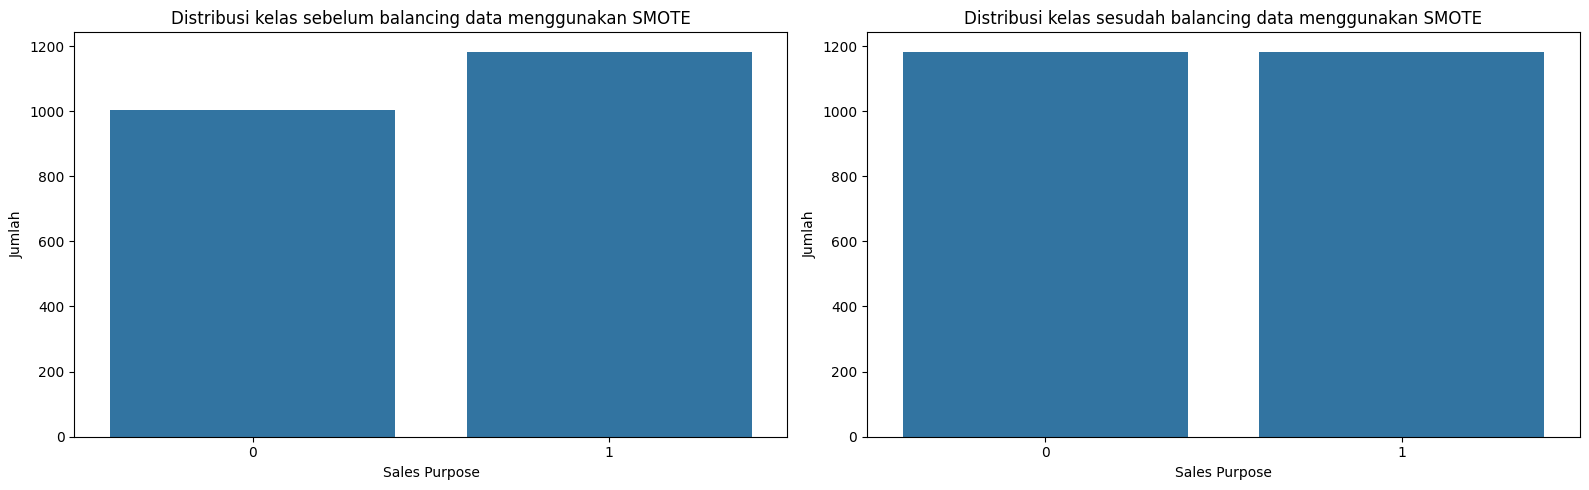

In [8]:
# Visualisasi distribusi kelas sebelum dan sesudah SMOTE dalam satu frame
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Sebelum SMOTE
sns.countplot(x=y, ax=axes[0])
axes[0].set_title('Distribusi kelas sebelum balancing data menggunakan SMOTE')
axes[0].set_xlabel('Sales Purpose')
axes[0].set_ylabel('Jumlah')

# Langkah 6: Data Balancing Menggunakan SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Setelah SMOTE
sns.countplot(x=y_balanced, ax=axes[1])
axes[1].set_title('Distribusi kelas sesudah balancing data menggunakan SMOTE')
axes[1].set_xlabel('Sales Purpose')
axes[1].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()



In [ ]:
# # Normalization
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_smote_resampled_normal = scaler.fit_transform(X_balanced)
# len(X_smote_resampled_normal)

In [ ]:
# Data Splitting

In [9]:
# Langkah 7: Membagi Data Menjadi Set Pelatihan dan Pengujian dengan rasio 80%-20%
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

In [14]:
# # Langkah 7: Membagi Data Menjadi Set Pelatihan dan Pengujian dengan rasio 80%-20%
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# # Langkah 7: Membagi Data Menjadi Set Pelatihan dan Pengujian dengan rasio 80%-20%
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# # Langkah 6: Data Balancing Menggunakan SMOTE
# smote = SMOTE(random_state=42)
# X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
# # Normalization
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_smote_resampled_normal = scaler.fit_transform(X_balanced)
# len(X_smote_resampled_normal)

In [ ]:
# # 1. Tuning Decision Tree
# param_dt = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [3, 5, 10, None],
#     'min_samples_split': [2, 5, 10]
# }
# dt = DecisionTreeClassifier(random_state=42)
# grid_dt = GridSearchCV(dt, param_dt, cv=5, n_jobs=-1, scoring='accuracy')
# grid_dt.fit(X_train, y_train)
# print("Best Decision Tree Params:", grid_dt.best_params_)
# print("Best Decision Tree Score (CV):", grid_dt.best_score_)


In [ ]:

# # 2. Tuning Random Forest
# param_rf = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [5, 10, None],
#     'min_samples_split': [2, 5, 10]
# }
# rf = RandomForestClassifier(random_state=42)
# grid_rf = GridSearchCV(rf, param_rf, cv=5, n_jobs=-1, scoring='accuracy')
# grid_rf.fit(X_train, y_train)
# print("Best Random Forest Params:", grid_rf.best_params_)
# print("Best Random Forest Score (CV):", grid_rf.best_score_)



In [ ]:
# # 3. Tuning Naive Bayes (GaussianNB)
# # Naive Bayes biasanya tidak banyak parameter untuk di-tuning, tapi kita bisa coba var_smoothing
# param_nb = {
#     'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
# }
# nb = GaussianNB()
# grid_nb = GridSearchCV(nb, param_nb, cv=5, n_jobs=-1, scoring='accuracy')
# grid_nb.fit(X_train, y_train)
# print("Best Naive Bayes Params:", grid_nb.best_params_)
# print("Best Naive Bayes Score (CV):", grid_nb.best_score_)



In [ ]:
# # 4. XGBoost
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# param_xgb = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 6, 10],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0]
# }
# xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# grid_xgb = GridSearchCV(xgb, param_xgb, cv=5, n_jobs=-1, scoring='accuracy')
# grid_xgb.fit(X_balanced, y_balanced)
# print("Best XGBoost Params:", grid_xgb.best_params_)
# print("Best XGBoost Score (CV):", grid_xgb.best_score_)


In [ ]:
# # 5. LightGBM
# from lightgbm import LGBMClassifier

# param_lgb = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 6, 10, -1],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0]
# }
# lgb = LGBMClassifier(random_state=42)
# grid_lgb = GridSearchCV(lgb, param_lgb, cv=5, n_jobs=-1, scoring='accuracy')
# grid_lgb.fit(X_balanced, y_balanced)
# print("Best LightGBM Params:", grid_lgb.best_params_)
# print("Best LightGBM Score (CV):", grid_lgb.best_score_)

In [ ]:
# # Evaluasi di data test untuk model terbaik
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print("\n--- Evaluasi Model Terbaik di Data Test ---")
# models = {
#     "Decision Tree": grid_dt.best_estimator_,
#     "Random Forest": grid_rf.best_estimator_,
#     "Naive Bayes": grid_nb.best_estimator_,
#     "XGBoost": grid_xgb.best_estimator_,
#     "LightGBM": grid_lgb.best_estimator_
# }



In [ ]:
# for name, model in models.items():
#     y_pred = model.predict(X_test)
#     print(f"\n{name}")
#     print("Test Accuracy:", accuracy_score(y_test, y_pred))
#     print("Classification Report:\n", classification_report(y_test, y_pred))
#     print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    

In [ ]:
# # membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
# X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_balanced, test_size=0.2, random_state=42,stratify = y_balanced)

In [20]:
# from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix,precision_score

# def evaluation(Y_test,Y_pred):
#     acc = accuracy_score(Y_test,Y_pred)
#     rcl = recall_score(Y_test,Y_pred,average = 'weighted')
#     f1 = f1_score(Y_test,Y_pred,average = 'weighted')
#     ps = precision_score(Y_test,Y_pred,average = 'weighted')
#     metric_dict={
#         'accuracy': round(acc,3),
#         'recall': round(rcl,3),
#         'F1 score': round(f1,3),
#         'Precision score': round(ps,3)
#     }
#     return print(metric_dict)

In [10]:
# Menampilkan ringkasan dari pembagian data setelah SMOTE
print("Dimensi X_train:", X_train.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_test:", y_test.shape)

print("Distribusi kelas pada y_train:")
print(y_train.value_counts())

print("Fitur yang digunakan:", X_train.columns)

Dimensi X_train: (1892, 9)
Dimensi y_train: (1892,)
Dimensi X_test: (474, 9)
Dimensi y_test: (474,)
Distribusi kelas pada y_train:
Sales Purpose
0    946
1    946
Name: count, dtype: int64
Fitur yang digunakan: Index(['Sex', 'Marital', 'Grade', 'Booking Status', 'Sales Event', 'Cluster',
       'View', 'Status KPR', 'Gross Area'],
      dtype='object')


# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">4. Modelling</p>

In [21]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


In [11]:
# 1. Tuning Decision Tree
param_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}
dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt, param_dt, cv=5, n_jobs=-1, scoring='accuracy')
grid_dt.fit(X_train, y_train)
print("Best Decision Tree Params:", grid_dt.best_params_)
print("Best Decision Tree Score (CV):", grid_dt.best_score_)

Best Decision Tree Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best Decision Tree Score (CV): 0.8197596012899442


In [19]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [12]:

# 2. Tuning Random Forest
param_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_rf, cv=5, n_jobs=-1, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("Best Random Forest Params:", grid_rf.best_params_)
print("Best Random Forest Score (CV):", grid_rf.best_score_)



Best Random Forest Params: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Best Random Forest Score (CV): 0.8255685387611509


In [20]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [13]:
# 3. Tuning Naive Bayes (GaussianNB)
# Naive Bayes biasanya tidak banyak parameter untuk di-tuning, tapi kita bisa coba var_smoothing
param_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}
nb = GaussianNB()
grid_nb = GridSearchCV(nb, param_nb, cv=5, n_jobs=-1, scoring='accuracy')
grid_nb.fit(X_train, y_train)
print("Best Naive Bayes Params:", grid_nb.best_params_)
print("Best Naive Bayes Score (CV):", grid_nb.best_score_)



Best Naive Bayes Params: {'var_smoothing': 1e-09}
Best Naive Bayes Score (CV): 0.7700883695606652


# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">5. Evaluation</p>

In [14]:
# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [15]:
# Fungsi untuk plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()


In [16]:
# Evaluasi dan visualisasi untuk setiap model
# models = {
#     'Decision Tree': dt_model,
#     'Random Forest': rf_model,
#     'Naive Bayes': nb_model
# }

models = {
    "Decision Tree": grid_dt.best_estimator_,
    "Random Forest": grid_rf.best_estimator_,
    "Naive Bayes": grid_nb.best_estimator_
}


Model: Decision Tree
Accuracy: 0.8248945147679325
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       237
           1       0.84      0.80      0.82       237

    accuracy                           0.82       474
   macro avg       0.83      0.82      0.82       474
weighted avg       0.83      0.82      0.82       474

Confusion Matrix:
 [[202  35]
 [ 48 189]]


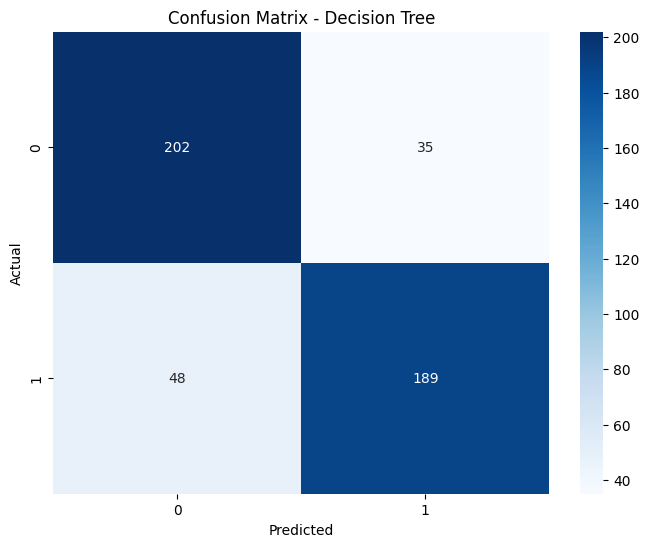

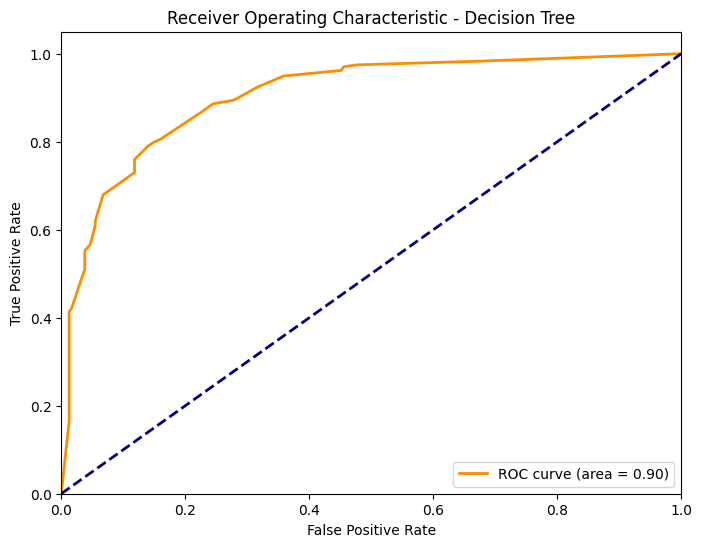


Model: Random Forest
Accuracy: 0.8248945147679325
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       237
           1       0.85      0.78      0.82       237

    accuracy                           0.82       474
   macro avg       0.83      0.82      0.82       474
weighted avg       0.83      0.82      0.82       474

Confusion Matrix:
 [[205  32]
 [ 51 186]]


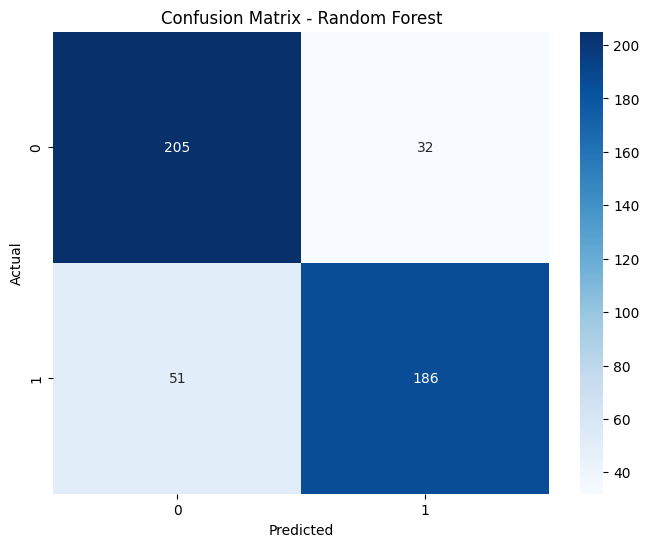

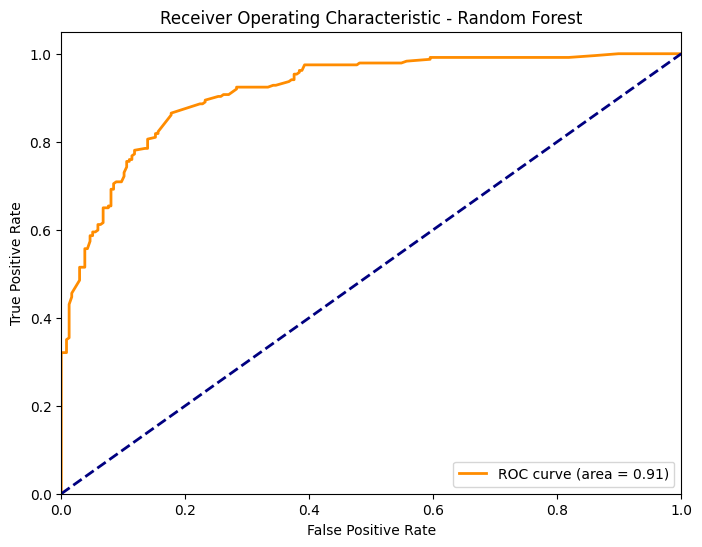


Model: Naive Bayes
Accuracy: 0.7616033755274262
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75       237
           1       0.74      0.80      0.77       237

    accuracy                           0.76       474
   macro avg       0.76      0.76      0.76       474
weighted avg       0.76      0.76      0.76       474

Confusion Matrix:
 [[172  65]
 [ 48 189]]


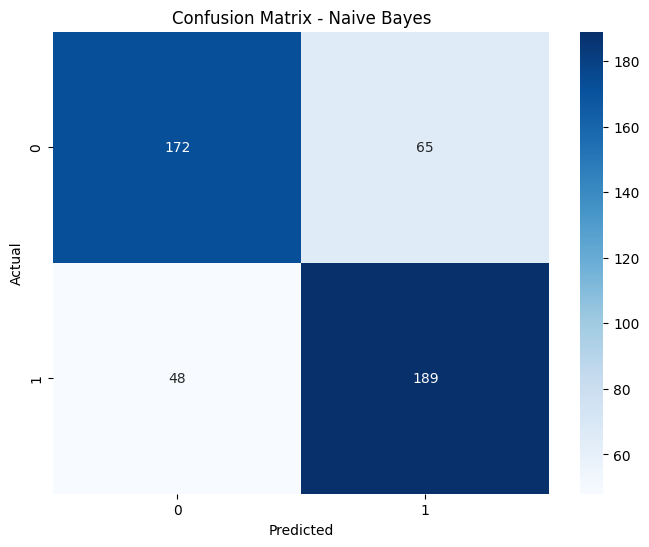

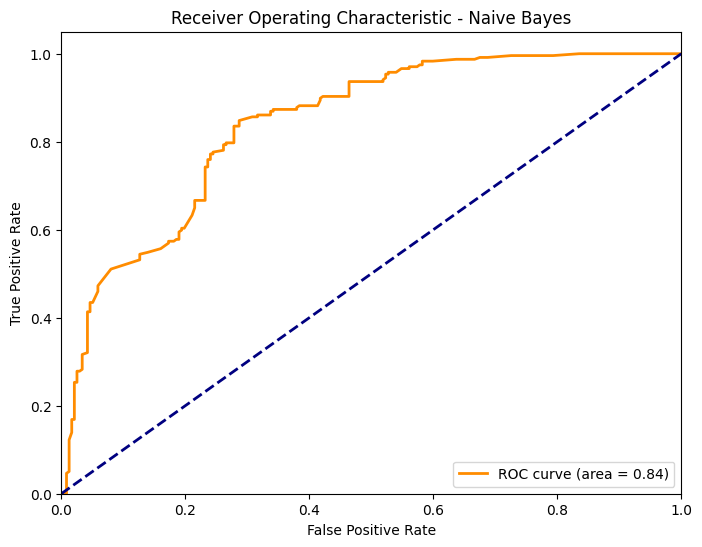

In [17]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)
    
    # Plot ROC curve if model supports probability prediction
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        plot_roc_curve(y_test, y_pred_proba, model_name)
    # elif model_name == 'SVM':  # SVM with linear kernel uses decision_function
    #     y_pred_proba = model.decision_function(X_test)
    #     plot_roc_curve(y_test, y_pred_proba, model_name)


In [19]:
model_comp1 = pd.DataFrame({
    'Model': ['Decision Tree','Random Forest','Naive Bayes'],
    'Accuracy': [grid_dt.best_score_*100,grid_rf.best_score_*100,grid_nb.best_score_*100]
    })
model_comp1.head()



,Model,Accuracy
0,Decision Tree,81.975960
1,Random Forest,82.556854
2,Naive Bayes,77.008837


In [ ]:
# # Evaluate Decision Tree
# accuracy_dt = accuracy_score(y_test, y_pred_dt)
# classification_report_dt = classification_report(y_test, y_pred_dt)
# confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# print("Decision Tree Accuracy:", accuracy_dt)
# print("Decision Tree Classification Report:\n", classification_report_dt)
# print("Decision Tree Confusion Matrix:\n", confusion_matrix_dt)

# # Evaluate Random Forest
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# classification_report_rf = classification_report(y_test, y_pred_rf)
# confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# print("Random Forest Accuracy:", accuracy_rf)
# print("Random Forest Classification Report:\n", classification_report_rf)
# print("Random Forest Confusion Matrix:\n", confusion_matrix_rf)

# # Evaluate Naive Bayes
# accuracy_nb = accuracy_score(y_test, y_pred_nb)
# classification_report_nb = classification_report(y_test, y_pred_nb)
# confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# print("Naive Bayes Accuracy:", accuracy_nb)
# print("Naive Bayes Classification Report:\n", classification_report_nb)
# print("Naive Bayes Confusion Matrix:\n", confusion_matrix_nb)

In [ ]:
# # Compile all results into a dictionary for easy comparison
# model_performance = {
#     'Decision Tree': {
#         'Accuracy': accuracy_dt,
#         'Classification Report': classification_report_dt,
#         'Confusion Matrix': confusion_matrix_dt
#     },
#     'Random Forest': {
#         'Accuracy': accuracy_rf,
#         'Classification Report': classification_report_rf,
#         'Confusion Matrix': confusion_matrix_rf
#     },
#     'Naive Bayes': {
#         'Accuracy': accuracy_nb,
#         'Classification Report': classification_report_nb,
#         'Confusion Matrix': confusion_matrix_nb
#     }
# }


# # Display model performance
# for model_name, performance in model_performance.items():
#     print(f"\nModel: {model_name}")
#     print(f"Accuracy: {performance['Accuracy']}")
#     print("Classification Report:\n", performance['Classification Report'])
#     print("Confusion Matrix:\n", performance['Confusion Matrix'])

# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">6. Deployment</p>

In [33]:
df = df.to_excel('simpan_data.xlsx')

In [ ]:
import joblib

# Menyimpan model
joblib.dump(dt_model, 'decision_tree_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(nb_model, 'naive_bayes_model.pkl')

In [ ]:
# Memuat model
loaded_dt_model = joblib.load('decision_tree_model.pkl')
loaded_rf_model = joblib.load('random_forest_model.pkl')
loaded_nb_model = joblib.load('naive_bayes_model.pkl')

In [ ]:
# Data baru untuk prediksi (sesuaikan dengan data Anda)
new_data = X_test.iloc[0].to_frame().T  # Mengambil satu baris data sebagai contoh

# Prediksi menggunakan model yang telah dimuat
prediction_dt = loaded_dt_model.predict(new_data)
prediction_rf = loaded_rf_model.predict(new_data)
prediction_nb = loaded_nb_model.predict(new_data)

# Menampilkan hasil prediksi
print(f"Decision Tree Prediction: {'Positif' if prediction_dt[0] == 1 else 'Negatif'}")
print(f"Random Forest Prediction: {'Positif' if prediction_rf[0] == 1 else 'Negatif'}")
print(f"Naive Bayes Prediction: {'Positif' if prediction_nb[0] == 1 else 'Negatif'}")